import os
import glob
import pandas as pd
os.chdir("/blue/vendor-nvidia/smith.kaleb/malonei/SEEG_data/new_seeg_data_more_patients_17/")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "/blue/vendor-nvidia/smith.kaleb/combined_17_patients.csv", index=False, encoding='utf-8-sig')




import os
import glob
import pandas as pd
os.chdir("/blue/vendor-nvidia/smith.kaleb/malonei/SEEG_data/new_seeg_data_more_columns_7/")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "/blue/vendor-nvidia/smith.kaleb/combined_7_more_data.csv", index=False, encoding='utf-8-sig')



In [1]:
import cudf
import cuml
import cupy as cp
import pandas as pd
import numpy as np
from cuml.manifold import TSNE
import matplotlib.pyplot as plt
!pip install catboost
from sklearn.preprocessing import LabelEncoder

path_ts = '/blue/vendor-nvidia/smith.kaleb/malonei/SEEG_data/new_seeg_data_more_columns_7/'
path_ts = '/blue/vendor-nvidia/smith.kaleb/malonei/SEEG_data/'

df_0 = pd.read_csv(path_ts+'data_output_CS201907.csv')
df_1 = pd.read_csv(path_ts+'data_output_CS201908.csv')
df_2 = pd.read_csv(path_ts+'data_output_CS201909.csv')
df_3 = pd.read_csv(path_ts+'data_output_CS201910.csv')
df_4 = pd.read_csv(path_ts+'data_output_CS201911.csv')
df_5 = pd.read_csv(path_ts+'data_output_CS201913.csv')
df_6 = pd.read_csv(path_ts+'data_output_CS202002.csv')

print(np.unique(df_0['Rec_SOZ']))
print(np.unique(df_1['Rec_SOZ']))
print(np.unique(df_2['Rec_SOZ']))
print(np.unique(df_3['Rec_SOZ']))
print(np.unique(df_4['Rec_SOZ']))
print(np.unique(df_5['Rec_SOZ']))
print(np.unique(df_6['Rec_SOZ']))
print(df_0.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)
print(df_6.shape)

df_0 = df_0[df_0['Rec_SOZ'].notna()]
df_1 = df_1[df_1['Rec_SOZ'].notna()]
df_2 = df_2[df_2['Rec_SOZ'].notna()]
df_3 = df_3[df_3['Rec_SOZ'].notna()]
df_4 = df_4[df_4['Rec_SOZ'].notna()]
df_5 = df_5[df_5['Rec_SOZ'].notna()]
df_6 = df_6[df_6['Rec_SOZ'].notna()]
print(np.unique(df_0['Rec_SOZ']))
print(np.unique(df_1['Rec_SOZ']))
print(np.unique(df_2['Rec_SOZ']))
print(np.unique(df_3['Rec_SOZ']))
print(np.unique(df_4['Rec_SOZ']))
print(np.unique(df_5['Rec_SOZ']))
print(np.unique(df_6['Rec_SOZ']))
print(df_0.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)
print(df_5.shape)
print(df_6.shape)

Defaulting to user installation because normal site-packages is not writeable
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
(81000, 506)
(96084, 506)
(93600, 506)
(116216, 506)
(66674, 506)
(27060, 506)
(92130, 506)
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
(81000, 506)
(96084, 506)
(93600, 506)
(116216, 506)
(66674, 506)
(27060, 506)
(92130, 506)


In [2]:
df_7_more_data  = pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6])
#df_7_more_data  = pd.concat([df_2,df_5,df_6])

print(df_7_more_data.shape)
del df_0
del df_1
del df_2
del df_3
del df_4
del df_5
del df_6


(572764, 506)


In [3]:
#print(df_all_ts.shape)
#import imbalanced-learn for oversampling
###!pip install -U imbalanced-learn ### *******
df_7_more_data[df_7_more_data.columns]= df_7_more_data[df_7_more_data.columns].fillna(0)
df_7_more_data.drop(df_7_more_data.index[df_7_more_data['Pat_ID'] == 0], inplace=True)
df_ts   = df_7_more_data.iloc[:,:100]


from scipy import stats
# turn into straight time series
#get rid of outliers
df_7_more_data = df_7_more_data[(np.abs(stats.zscore(df_ts)) < 3).all(axis=1)]
#print(df_7_more_data.head())
#df_combined_17['Pat_ID'] = df_combined_17['Pat_ID'].apply(str)
df_ts   = df_7_more_data.iloc[:,:100]

df_patID = df_7_more_data['Pat_ID']
df_label = df_7_more_data['Rec_SOZ']
df_7_more_data = df_7_more_data.drop(columns=['Pat_ID','Rec_SOZ'])
df_meta  = df_7_more_data.iloc[:,495:]


#print(df_patID.value_counts())
#print(df_label.value_counts())
#print(df_7_more_data.shape)
#print(df_ts.shape)
#print(df_patID.shape)
#print(df_label.shape)
#print(df_meta.shape)

#One hot encode
columns=df_meta.columns
print(columns)
# Print head
#df_7_more_data.head()
#print(df_7_more_data.shape) 

Index(['Stim_Elec', 'Stim_Amp', 'Rec_Elec', 'Stim_Tiss', 'Rec_Tiss',
       'Stim_Loc', 'Rec_Loc', 'Stim_Depth', 'Rec_Depth'],
      dtype='object')


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder(BaseEstimator, TransformerMixin):
    """Target encoder.
    
    Replaces categorical column(s) with the mean target value for
    each category.

    """
    
    def __init__(self, cols=None):
        """Target encoder
        
        Parameters
        ----------
        cols : list of str
            Columns to target encode.  Default is to target 
            encode all categorical columns in the DataFrame.
        """
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols
        
        
    def fit(self, X, y):
        """Fit target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X 
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.maps = dict() #dict to store map for each column
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap
            
        return self

        
    def transform(self, X, y=None):
        """Perform the target encoding transformation.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
            
        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo
            
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [5]:
te = TargetEncoder()
X_target_encoded = te.fit_transform(df_meta, df_label)
X_target_encoded.head()


,Stim_Elec,Stim_Amp,Rec_Elec,Stim_Tiss,Rec_Tiss,Stim_Loc,Rec_Loc,Stim_Depth,Rec_Depth
0,2,7500,1,0.069654,0.122697,0.062376,0.0,0.34,0.77
1,29,7500,1,0.069654,0.122697,0.076844,0.0,1.16,0.77
2,63,7500,1,0.069654,0.122697,0.055731,0.0,5.69,0.77
3,42,7500,1,0.069654,0.122697,0.055239,0.0,2.05,0.77
4,22,7500,1,0.069654,0.122697,0.095099,0.0,3.17,0.77


In [30]:
df_meta.head()

,Stim_Elec,Stim_Amp,Rec_Elec,Stim_Tiss,Rec_Tiss,Stim_Loc,Rec_Loc,Stim_Depth,Rec_Depth
0,2,7500,1,Gray,Gray,OrG_L_6_3,OrG_L_6_3,0.34,0.77
1,29,7500,1,Gray,Gray,MTG_L_4_2,OrG_L_6_3,1.16,0.77
2,63,7500,1,Gray,Gray,Amyg_R_2_2,OrG_L_6_3,5.69,0.77
3,42,7500,1,Gray,Gray,OrG_R_6_3,OrG_L_6_3,2.05,0.77
4,22,7500,1,Gray,Gray,Hipp_L_2_1,OrG_L_6_3,3.17,0.77


In [7]:
X = df_7_more_data.to_numpy()
X_train = cp.array(X,dtype=cp.float32)

tsne    = TSNE(n_components=2, perplexity=50, learning_rate=20,n_neighbors=150, metric='cosine')
tsne_2D = tsne.fit_transform(X_train)

tsne_2D_n = cp.asnumpy(tsne_2D)
x, y = tsne_2D_n.T
fig, ax = plt.subplots(figsize=(18, 18))
ax.scatter(x, y, s=2, c=df_label.values, cmap=plt.cm.coolwarm)
ax.set_title('t-SNE plot for all patients features', fontsize=18)
plt.show();


KeyboardInterrupt



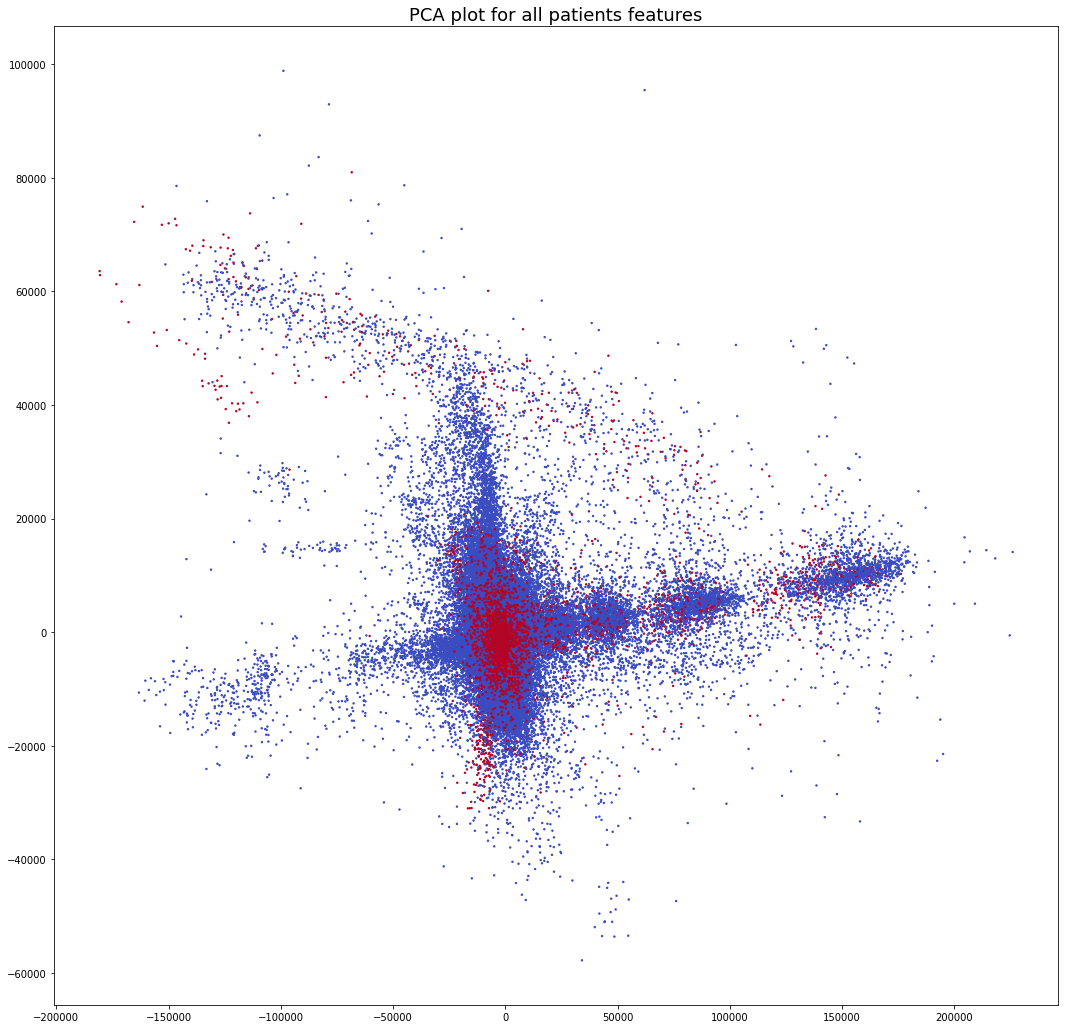

In [55]:
from cuml import PCA
from cuml.decomposition import PCA

pca_float = PCA(n_components = 2)
pca_2D = pca_float.fit_transform(X_train)

pca_2D_n = cp.asnumpy(pca_2D)
x, y = pca_2D_n.T
fig, ax = plt.subplots(figsize=(18, 18))
ax.scatter(x, y, s=2, c=df_label.values, cmap=plt.cm.coolwarm)
ax.set_title('PCA plot for all patients features', fontsize=18)
plt.show();

[0 1]


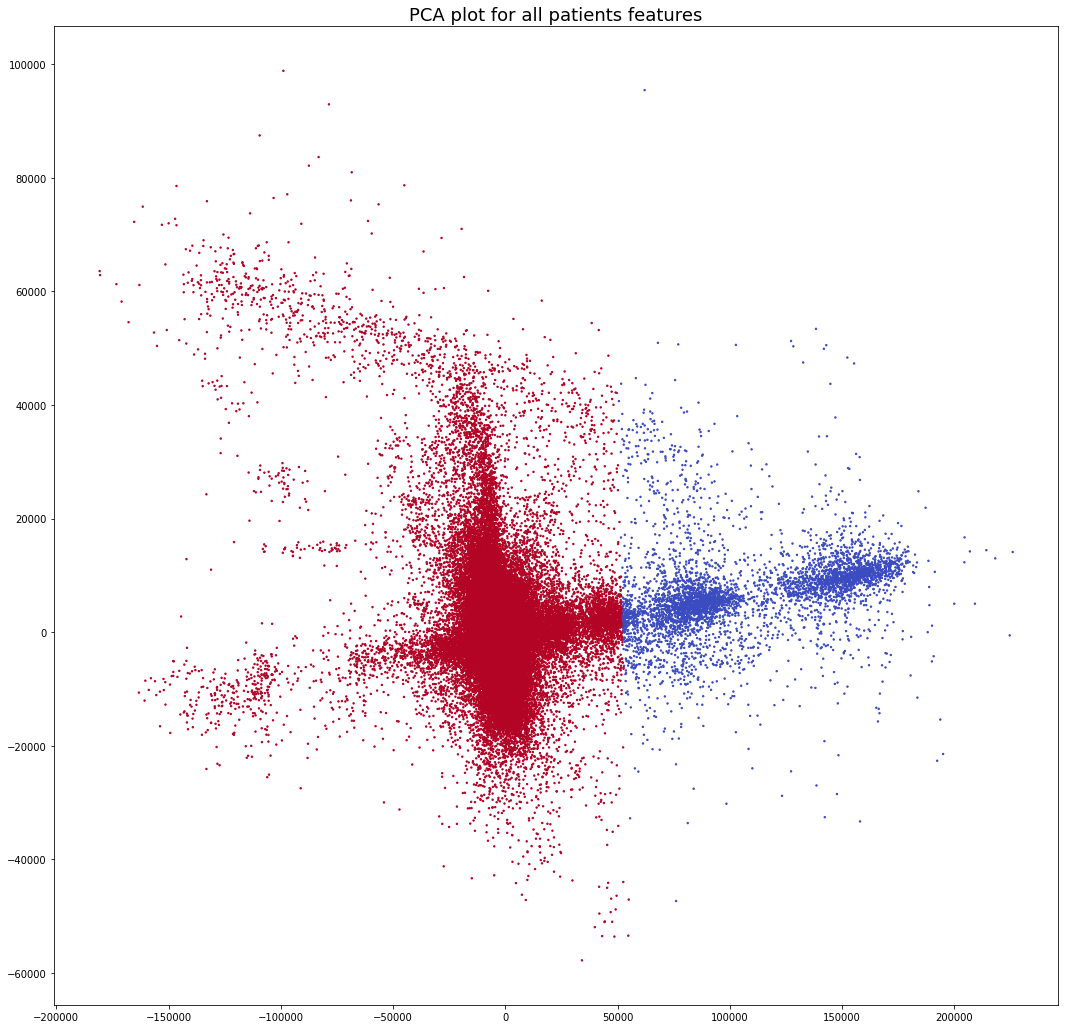

In [56]:
from cuml import DBSCAN
from cuml.cluster import KMeans
import cupy as cp
import cudf


kmeans_float = KMeans(n_clusters=2)
kmeans_float.fit(pca_2D)
km_labels = kmeans_float.labels_


km_labels_n = cp.asnumpy(km_labels)

print(np.unique(km_labels_n))
x, y = pca_2D_n.T
fig, ax = plt.subplots(figsize=(18, 18))
ax.scatter(x, y, s=2, c=km_labels_n, cmap=plt.cm.coolwarm)
ax.set_title('PCA plot for all patients features', fontsize=18)
plt.show();

In [6]:
from collections import Counter
from cuml.preprocessing import StandardScaler, MinMaxScaler
from cuml.ensemble import RandomForestClassifier as cuRFC
from cuml.svm import SVC
from sklearn.metrics import classification_report
from cuml.neighbors import KNeighborsClassifier
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedGroupKFold
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN 
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
%matplotlib inline

uniq_pat_id = np.unique(df_patID)

print(uniq_pat_id)


#Group shuffle split
splitter = GroupShuffleSplit(test_size=.4, n_splits=len(uniq_pat_id), random_state = 7)

#Leave on group out
logo = LeaveOneGroupOut()

#GroupKFold
group_kfold = GroupKFold(n_splits=7)

#StriratedGroupKFold
sgkFold = StratifiedGroupKFold(n_splits=len(uniq_pat_id))

# Random Forest
i = 0

['CS201907' 'CS201908' 'CS201909' 'CS201910' 'CS201911' 'CS201913'
 'CS202002']


In [7]:
import cupy as cp
import cudf as cudf
meta = list(np.arange(495,506))

#df_7_more_data = pd.concat([df_ts,df_meta],axis=1)
df_7_more_data = pd.concat([df_ts,X_target_encoded],axis=1)
df_7_more_data.shape

print(meta)


[495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505]


In [11]:
X = df_7_more_data.to_numpy()
y = df_label.to_numpy()
      
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('oversampling...')
#resampling by doing over sampling and undersampling
sme = SMOTE(random_state=42, n_jobs=-1)
X_train, y_train = sme.fit_resample(X_train, y_train)

## create np array from groupsplit on pat ID
X_train = cp.array(X_train,dtype=cp.float32)
y_train = cp.array(y_train,dtype=cp.int32)
X_test = cp.array(X_test,dtype=cp.float32)
y_test = cp.array(y_test,dtype=cp.int32)

print('Train set size  ', X_train.shape)
print('Test set size   ', X_test.shape)

scaler = StandardScaler() #MinMaxScaler() #
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Run cuml KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)
y_pred = knn.predict(X_test)
print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred), target_names=['0','1']))

cm = confusion_matrix(cp.asnumpy(y_test),cp.asnumpy(y_pred))
cm_display = ConfusionMatrixDisplay(cm).plot()

oversampling...


MemoryError: std::bad_alloc: CUDA error at: /apps/rapidsai/21.12/include/rmm/mr/device/cuda_memory_resource.hpp

Train Set Pat ID:  ['CS201908' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201907' 'CS201909' 'CS201913']
[0 1]
oversampling...
Gradient Boosting


/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:33:57] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:33:58] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    170992
           1       0.95      0.06      0.11     25784

    accuracy                           0.88    196776
   macro avg       0.91      0.53      0.52    1

/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:34:52] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:34:53] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.94      0.95    196187
           1       0.21      0.33      0.25      9141

    accuracy                           0.91    205328
   macro avg       0.59      0.63      0.60    2

/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:35:58] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:35:58] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.99      0.94    188186
           1       0.53      0.11      0.18     23209

    accuracy                           0.89    211395
   macro avg       0.72      0.55      0.56    2

/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:36:59] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:37:00] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    175744
           1       0.39      0.14      0.21      9966

    accuracy                           0.94    185710
   macro avg       0.67      0.57      0.59    1

/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:37:36] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:37:36] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    225234
           1       0.26      0.08      0.13     25493

    accuracy                           0.88    250727
   macro avg       0.58      0.53      0.53    2

/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:38:02] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:38:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    239226
           1       0.52      0.25      0.34     11326

    accuracy                           0.96    250552
   macro avg       0.74      0.62      0.66    2

/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(
/apps/rapidsai/21.12/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:39:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:39:03] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1639022671260/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    170992
           1       0.95      0.06      0.11     25784

    accuracy                           0.88    196776
   macro avg       0.91      0.53      0.52    1

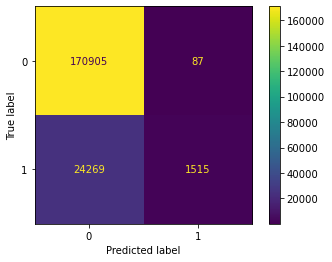

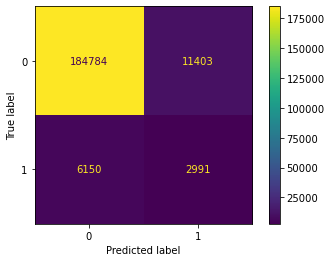

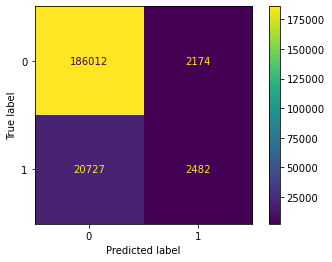

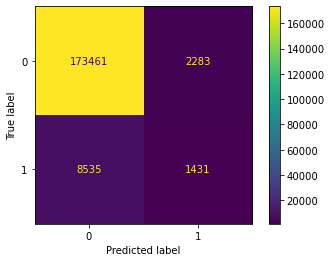

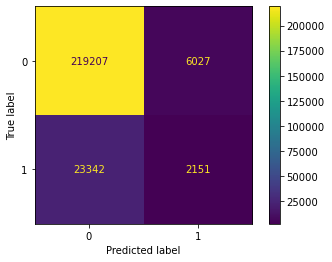

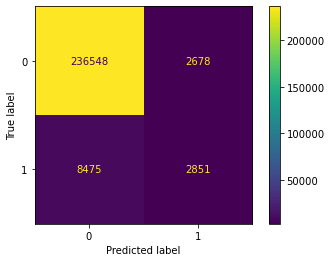

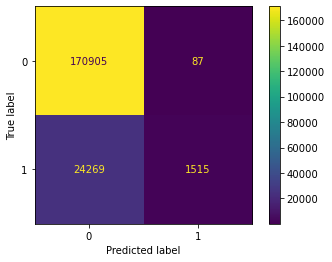

In [28]:
from sklearn.model_selection import KFold
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from sklearn.ensemble import (RandomForestClassifier,ExtraTreesClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Fit classifier with out-of-bag estimates
params = {
    "n_estimators": 500,
    "max_depth": 3,
    "subsample": 0.5,
    "learning_rate": 0.01,
    "min_samples_leaf": 1,
    "random_state": 3,
    "min_samples_split":5,
    "verbose": 1,
}
params_xgb = {
    "n_estimators": 1200,
    "max_depth": 4,
    "subsample": 0.5,
    "learning_rate": 0.01,
    "min_samples_leaf": 1,
    "random_state": 3,
    "min_samples_split":5,
    "verbosity": 0,
    "scale_pos_weight": 10000,
}


for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
        print(np.unique(y_test))               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTE(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        

        scaler = StandardScaler() #MinMaxScaler() #
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        #get sample weights 
        class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                           classes=np.unique(y_train),
                                           y=y_train)
        class_weights = dict(zip(np.unique(y_train), class_weights))

        s_weights = class_weight.compute_sample_weight(class_weights,y_train)
        
        #run gradient boosting
        print('Gradient Boosting')
        clf_gb = xgb.XGBClassifier(n_estimators=1200,tree_method='hist',subsample=0.5,
                                   random_state = 3, n_jobs=-1,min_samples_split =5,verbosity= 1,
                                  scale_pos_weight = .0001)
        clf_gb.fit(X_train,y_train,s_weights,verbose=True)
        #run adaboost 
        #print('Ada Boosting')
        #clf_ada = AdaBoostClassifier(n_estimators =500, learning_rate= 0.01, random_state=42)
        #clf_ada.fit(X_train,y_train,s_weights)
        #run extra tree
        #print('Extra Boosting')
        #clf_ext = ExtraTreesClassifier(n_estimators=500,max_depth=4,min_samples_split=5,verbose=1,random_state=42,n_jobs=-1)
        #clf_ext.fit(X_train,y_train,s_weights)
        #run random forest 
        #print('RF Boosting')
        #clf_rf = RandomForestClassifier(n_estimators=500,max_depth=6,min_samples_split=7,verbose=1,random_state=42,n_jobs=-1)
        #clf_rf.fit(X_train,y_train,s_weights)        
        #Run 
        
        #create a dictionary of our models
        #estimators=[('GradBoost', clf_gb),('adaBoost', clf_ada),('ExTree', clf_ext),('RF',clf_rf)]
        #create our voting classifier, inputting our models
        #ensemble = VotingClassifier(estimators, voting='soft') #try 'soft' voting before deleting
        #ensemble.fit(X_train, y_train)
        y_pred = clf_gb.predict(X_test)
        print(classification_report(y_test, y_pred, target_names=['0','1']))
        
        cm = confusion_matrix(y_test,y_pred)
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

Train Set Pat ID:  ['CS201908' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201907' 'CS201909' 'CS201913']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.89      0.97      0.93    170992
           1       0.47      0.19      0.27     25784

    accuracy                           0.87    196776
   macro avg       0.68      0.58      0.60    196776
weighted avg       0.83      0.87      0.84    196776

Train Set Pat ID:  ['CS201907' 'CS201908' 'CS201909' 'CS202002']
Test Set Pat ID:  ['CS201910' 'CS201911' 'CS201913']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.97      0.89      0.93    196187
           1       0.16      0.46      0.24      9141

    accuracy                           0.87    205328
   macro avg       0.57      0.67      0.58    205328
weighted avg       0.94      0.87      0.90    205328

Train Set Pat ID:  ['CS201907' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201908' 'CS201909' 'CS201913']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.91      0.93      0.92    188186
           1       0.35      0.30      0.32     23209

    accuracy                           0.86    211395
   macro avg       0.63      0.61      0.62    211395
weighted avg       0.85      0.86      0.86    211395

Train Set Pat ID:  ['CS201907' 'CS201909' 'CS201910' 'CS202002']
Test Set Pat ID:  ['CS201908' 'CS201911' 'CS201913']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.97      0.95      0.96    175744
           1       0.39      0.51      0.44      9966

    accuracy                           0.93    185710
   macro avg       0.68      0.73      0.70    185710
weighted avg       0.94      0.93      0.93    185710

Train Set Pat ID:  ['CS201907' 'CS201910' 'CS201913' 'CS202002']
Test Set Pat ID:  ['CS201908' 'CS201909' 'CS201911']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.92      0.93      0.93    225234
           1       0.31      0.26      0.28     25493

    accuracy                           0.87    250727
   macro avg       0.61      0.60      0.60    250727
weighted avg       0.86      0.87      0.86    250727

Train Set Pat ID:  ['CS201907' 'CS201909' 'CS201910' 'CS201913']
Test Set Pat ID:  ['CS201908' 'CS201911' 'CS202002']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.99      0.95      0.97    239226
           1       0.39      0.73      0.51     11326

    accuracy                           0.94    250552
   macro avg       0.69      0.84      0.74    250552
weighted avg       0.96      0.94      0.95    250552

Train Set Pat ID:  ['CS201908' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201907' 'CS201909' 'CS201913']
[0 1]
oversampling...
catboosting! ... 


              precision    recall  f1-score   support

           0       0.89      0.97      0.93    170992
           1       0.47      0.19      0.27     25784

    accuracy                           0.87    196776
   macro avg       0.68      0.58      0.60    196776
weighted avg       0.83      0.87      0.84    196776



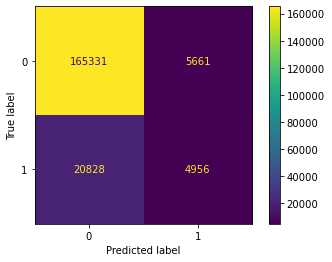

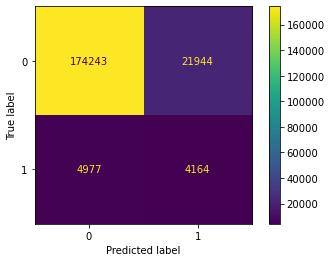

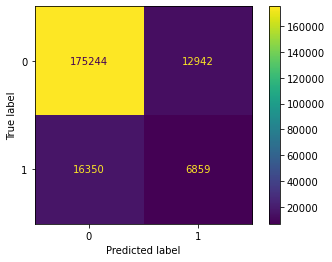

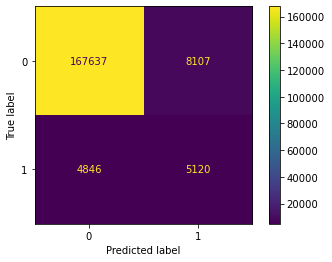

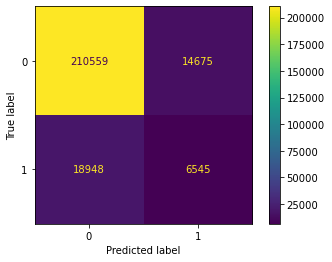

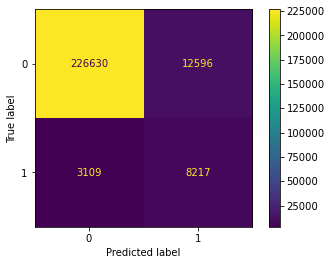

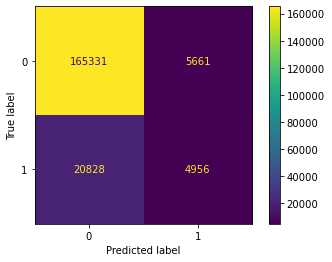

In [29]:
from sklearn.model_selection import KFold
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from sklearn.ensemble import (RandomForestClassifier,ExtraTreesClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import catboost
from catboost import CatBoostClassifier
# Fit classifier with out-of-bag estimates
params = {
    "n_estimators": 500,
    "max_depth": 3,
    "subsample": 0.5,
    "learning_rate": 0.01,
    "min_samples_leaf": 1,
    "random_state": 3,
    "min_samples_split":5,
    "verbose": 1,
}
params_xgb = {
    "n_estimators": 1200,
    "max_depth": 4,
    "subsample": 0.5,
    "learning_rate": 0.01,
    "min_samples_leaf": 1,
    "random_state": 3,
    "min_samples_split":5,
    "verbosity": 0,
    "scale_pos_weight": 10000,
}


for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
        print(np.unique(y_test))               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTE(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        

        scaler = StandardScaler() #MinMaxScaler() #
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        #get sample weights 
        class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                           classes=np.unique(y_train),
                                           y=y_train)
        class_weights = dict(zip(np.unique(y_train), class_weights))

        s_weights = class_weight.compute_sample_weight(class_weights,y_train)
        
        #run gradient boosting
        print('catboosting! ... ')
        clf_cat = CatBoostClassifier(
                    iterations=1000,
                    learning_rate=0.01,
                    random_seed = 42,
                    #auto_class_weights = 'Balanced',
                    loss_function='Logloss',
                    eval_metric = 'F1',
                    task_type = "GPU",
                    #subsample = 0.5,
                    class_weights  = class_weights,
                    verbose=False
                )
        
        clf_cat.fit(X_train, y_train )
        ## Predict the model
        y_pred = clf_cat.predict(X_test)

        print(classification_report(y_test, y_pred, target_names=['0','1']))
        
        cm = confusion_matrix(y_test,y_pred)
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

Train Set Pat ID:  ['CS201908' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201907' 'CS201909' 'CS201913']
oversampling...
Train set size   (700060, 504)
Test set size    (196732, 504)
[D] [22:38:01.370235] cuml/common/logger.cpp:2889 Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
[D] [22:38:03.653851] cuml/common/logger.cpp:2889 Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
[D] [22:38:03.666329] cuml/common/logger.cpp:2889 Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
[D] [22:38:03.687092] cuml/common/logger.cpp:2889 Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
[D] [22:38:03.717329] cuml/common/logger.cpp:2889 Expected column ('F') major order, but got the opposit

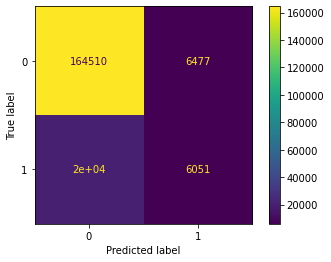

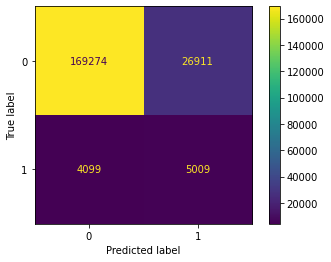

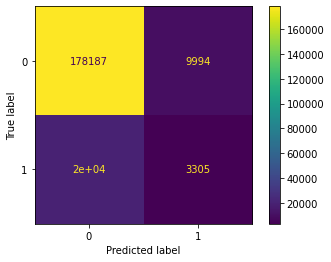

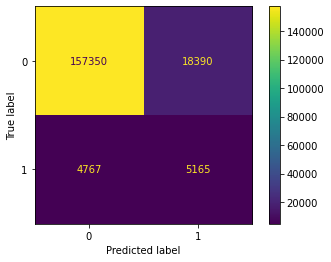

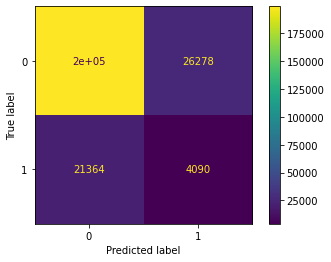

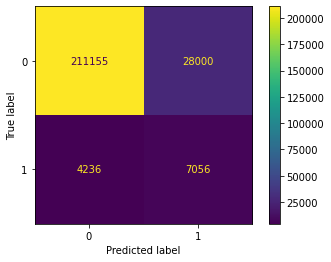

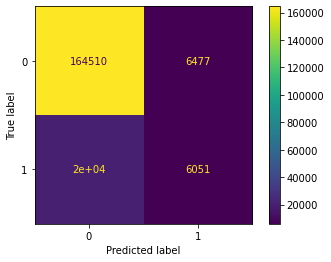

In [17]:
from sklearn.utils import class_weight
for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTE(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        
        ## create np array from groupsplit on pat ID
        X_train = cp.array(X_train,dtype=cp.float32)
        y_train = cp.array(y_train,dtype=cp.int32)
        X_test = cp.array(X_test.to_numpy(),dtype=cp.float32)
        y_test = cp.array(y_test.to_numpy(),dtype=cp.int32)
        
        print('Train set size  ', X_train.shape)
        print('Test set size   ', X_test.shape)
        
        scaler = MinMaxScaler() #StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
       
        class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                           classes=np.unique(cp.asnumpy(y_train)),
                                           y=cp.asnumpy(y_train))
        class_weights = dict(zip(np.unique(cp.asnumpy(y_train)), class_weights))

        s_weights = class_weight.compute_sample_weight(class_weights,cp.asnumpy(y_train))    
        #Run cuml KNN
        clf_scm = SVC(kernel='poly', degree=5, gamma='scale', C=1, class_weight = 'balanced',max_iter=10000,verbose=True)
        clf_scm_rbf = SVC(kernel='rbf',  gamma='scale', C=1, class_weight = 'balanced',max_iter=10000, verbose=True)

        clf_scm.fit(X_train, y_train,s_weights)
        y_pred = clf_scm.predict(X_test)
        clf_scm_rbf.fit(X_train, y_train,s_weights)
        y_pred_rbf = clf_scm_rbf.predict(X_test)        
        print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred), target_names=['0','1']))
        print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred_rbf), target_names=['0','1']))
        
        cm = confusion_matrix(cp.asnumpy(y_test),cp.asnumpy(y_pred))
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

[495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505]
(561302, 109)
Train Set Pat ID:  ['CS201908' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201907' 'CS201909' 'CS201913']
oversampling...
Train set size   (700206, 109)
Test set size    (196776, 109)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    170992
           1       0.36      0.33      0.34     25784

    accuracy                           0.84    196776
   macro avg       0.63      0.62      0.63    196776
weighted avg       0.83      0.84      0.83    196776

Train Set Pat ID:  ['CS201907' 'CS201908' 'CS201909' 'CS202002']
Test Set Pat ID:  ['CS201910' 'CS201911' 'CS201913']
oversampling...
Train set size   (649816, 109)
Test set size    (205328, 109)
              precision    recall  f1-score   support

           0       0.97      0.87      0.92    196187
           1       0.13      0.42      0.20      9141

    accuracy                           0.85    

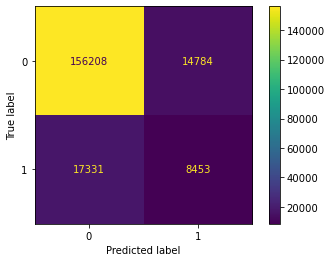

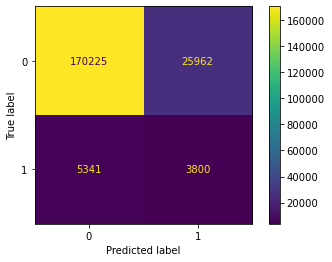

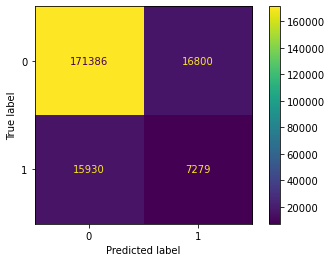

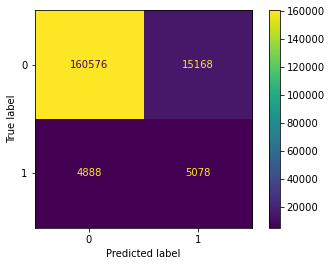

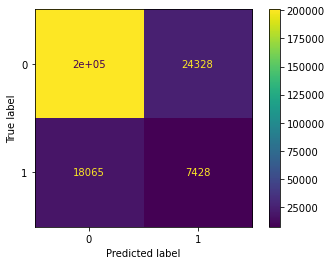

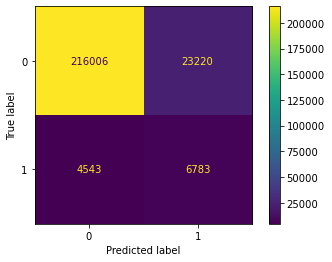

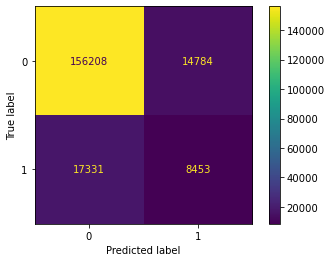

In [11]:
print(meta)
print(df_7_more_data.shape)
from sklearn.utils import class_weight

for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTE(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        
        ## create np array from groupsplit on pat ID
        X_train = cp.array(X_train,dtype=cp.float32)
        y_train = cp.array(y_train,dtype=cp.int32)
        X_test = cp.array(X_test.to_numpy(),dtype=cp.float32)
        y_test = cp.array(y_test.to_numpy(),dtype=cp.int32)
        
        print('Train set size  ', X_train.shape)
        print('Test set size   ', X_test.shape)
        
        scaler = StandardScaler() #MinMaxScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
       
        class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                           classes=np.unique(cp.asnumpy(y_train)),
                                           y=cp.asnumpy(y_train))
        class_weights = dict(zip(np.unique(cp.asnumpy(y_train)), class_weights))

        s_weights = class_weight.compute_sample_weight(class_weights,cp.asnumpy(y_train))    
        
        #Run cuml KNN
        knn1 = KNeighborsClassifier(n_neighbors=1)
        #knn1.fit(X_train, y_train)
        #y_pred1 = knn1.predict(X_test)
        rf = cuRFC(max_samples=1.0,
                   n_bins=512,
                   max_depth = 8,
                   n_estimators=1024,
                   min_samples_split = 5,
                   verbose=False)
        knn3 = KNeighborsClassifier(n_neighbors=3)
        knn3.fit(X_train, y_train,s_weights.all())
        y_pred3 = knn3.predict(X_test)        
        knn9 = KNeighborsClassifier(n_neighbors=10)
        #knn9.fit(X_train, y_train)
        #y_pred9 = knn9.predict(X_test)  
        
        #estimators = [('rf', rf),('knn2', knn3),('knn3',knn9)]
        #clf = VotingClassifier(estimators=estimators, voting='soft',n_jobs=-1)
        
        #clf.fit(cp.asnumpy(X_train),cp.asnumpy(y_train))
        #y_pred = clf.predict(cp.asnumpy(X_test))
        
        print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred3), target_names=['0','1']))
        
        cm = confusion_matrix(cp.asnumpy(y_test),cp.asnumpy(y_pred3))
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

Train Set Pat ID:  ['CS201909' 'CS201913']
Test Set Pat ID:  ['CS202002']
oversampling...
Train set size   (122611, 512)
Test set size    (22091, 512)
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     19655
           1       0.16      0.41      0.23      2436

    accuracy                           0.69     22091
   macro avg       0.53      0.57      0.52     22091
weighted avg       0.83      0.69      0.75     22091

Train Set Pat ID:  ['CS201913' 'CS202002']
Test Set Pat ID:  ['CS201909']
oversampling...
Train set size   (74956, 512)
Test set size    (52788, 512)
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     47561
           1       0.14      0.32      0.20      5227

    accuracy                           0.74     52788
   macro avg       0.53      0.55      0.52     52788
weighted avg       0.84      0.74      0.78     52788

Train Set Pat ID:  ['CS201909' 'CS201913']
Te

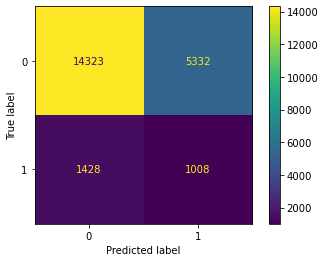

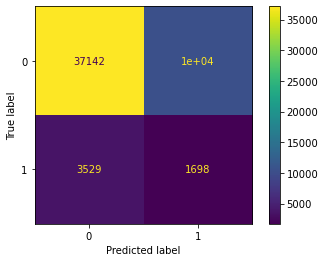

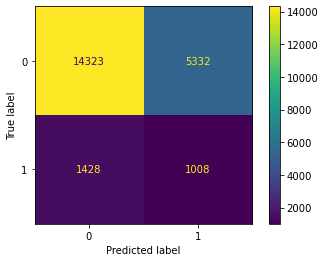

In [96]:
for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTEENN(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        
        ## create np array from groupsplit on pat ID
        X_train = cp.array(X_train,dtype=cp.float32)
        y_train = cp.array(y_train,dtype=cp.int32)
        X_test = cp.array(X_test.to_numpy(),dtype=cp.float32)
        y_test = cp.array(y_test.to_numpy(),dtype=cp.int32)
        
        print('Train set size  ', X_train.shape)
        print('Test set size   ', X_test.shape)
        
        scaler = StandardScaler() #MinMaxScaler() #
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
       
        #Run cuml KNN
        knn = KNeighborsClassifier(n_neighbors=9)
        knn.fit(X_train, y_train)
        knn.score(X_test,y_test)
        y_pred = knn.predict(X_test)
        print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred), target_names=['0','1']))
        
        cm = confusion_matrix(cp.asnumpy(y_test),cp.asnumpy(y_pred))
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

Train Set Pat ID:  ['CS201909' 'CS201913']
Test Set Pat ID:  ['CS202002']
oversampling...
Train set size   (122611, 512)
Test set size    (22091, 512)
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     19655
           1       0.30      0.12      0.17      2436

    accuracy                           0.87     22091
   macro avg       0.60      0.54      0.55     22091
weighted avg       0.83      0.87      0.85     22091

Train Set Pat ID:  ['CS201913' 'CS202002']
Test Set Pat ID:  ['CS201909']
oversampling...
Train set size   (74956, 512)
Test set size    (52788, 512)
              precision    recall  f1-score   support

           0       0.99      0.72      0.84     47561
           1       0.27      0.94      0.42      5227

    accuracy                           0.74     52788
   macro avg       0.63      0.83      0.63     52788
weighted avg       0.92      0.74      0.79     52788

Train Set Pat ID:  ['CS201909' 'CS201913']
Te

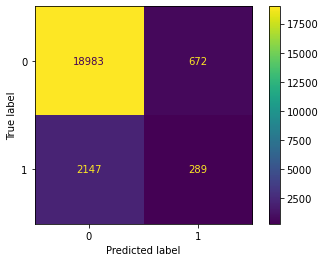

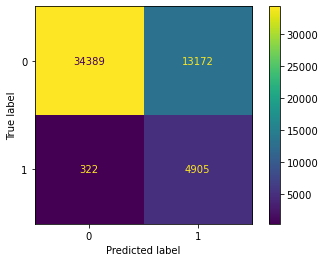

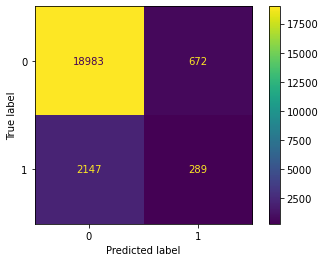

In [13]:
for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTEENN(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        
        ## create np array from groupsplit on pat ID
        X_train = cp.array(X_train,dtype=cp.float32)
        y_train = cp.array(y_train,dtype=cp.int32)
        X_test = cp.array(X_test.to_numpy(),dtype=cp.float32)
        y_test = cp.array(y_test.to_numpy(),dtype=cp.int32)
        
        print('Train set size  ', X_train.shape)
        print('Test set size   ', X_test.shape)
        
        scaler = StandardScaler() #MinMaxScaler() #
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
       
        #Run cuml Random Forest
        cuml_model = cuRFC(n_bins=8,
                           max_depth = 8,
                           n_estimators=512,
                           min_samples_split = 15,
                           verbose=False)
        cuml_model.fit(X_train,y_train)
        cuml_model.score(X_test,y_test)
        y_pred = cuml_model.predict(X_test) 
        print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred), target_names=['0','1']))
        
        cm = confusion_matrix(cp.asnumpy(y_test),cp.asnumpy(y_pred))
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

Train Set Pat ID:  ['CS201909' 'CS201913']
Test Set Pat ID:  ['CS202002']
oversampling...
Train set size   (122611, 512)
Test set size    (22091, 512)


/home/smith.kaleb/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smith.kaleb/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smith.kaleb/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     19655
           1       0.00      0.00      0.00      2436

    accuracy                           0.89     22091
   macro avg       0.44      0.50      0.47     22091
weighted avg       0.79      0.89      0.84     22091

Train Set Pat ID:  ['CS201913' 'CS202002']
Test Set Pat ID:  ['CS201909']
oversampling...
Train set size   (74956, 512)
Test set size    (52788, 512)
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     47561
           1       0.21      0.46      0.29      5227

    accuracy                           0.77     52788
   macro avg       0.57      0.63      0.57     52788
weighted avg       0.86      0.77      0.81     52788

Train Set Pat ID:  ['CS201909' 'CS201913']
Test Set Pat ID:  ['CS202002']
oversampling...
Train set size   (122611, 512)
Test set size    (22091, 512)
              precision    recall  f1-score  

/home/smith.kaleb/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smith.kaleb/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/smith.kaleb/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


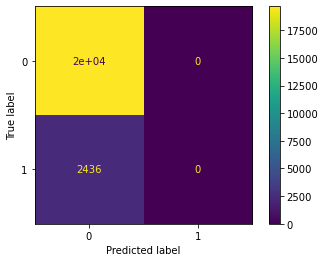

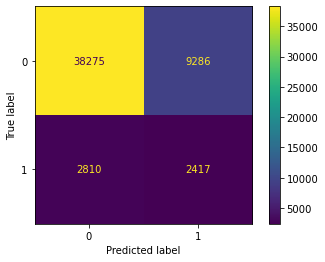

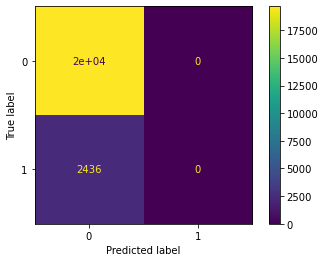

In [98]:
for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTEENN(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        
        ## create np array from groupsplit on pat ID
        X_train = cp.array(X_train,dtype=cp.float32)
        y_train = cp.array(y_train,dtype=cp.int32)
        X_test = cp.array(X_test.to_numpy(),dtype=cp.float32)
        y_test = cp.array(y_test.to_numpy(),dtype=cp.int32)
        
        print('Train set size  ', X_train.shape)
        print('Test set size   ', X_test.shape)
        
        scaler = StandardScaler() #MinMaxScaler() #
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
       
        #Run cuml Random Forest
        cuml_model = cuRFC(n_bins=128,
                           max_depth = 32,
                           n_estimators=1024,
                           verbose=False)
        cuml_model.fit(X_train,y_train)
        cuml_model.score(X_test,y_test)
        y_pred = cuml_model.predict(X_test) 
        print(classification_report(cp.asnumpy(y_test), cp.asnumpy(y_pred), target_names=['0','1']))
        
        cm = confusion_matrix(cp.asnumpy(y_test),cp.asnumpy(y_pred))
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

In [ ]:
from cuml.linear_model import LogisticRegression
for train_idx, test_idx in splitter.split(df_7_more_data, groups=df_patID):
        print('Train Set Pat ID: ',np.unique(df_patID.iloc[train_idx]))
        print('Test Set Pat ID: ',np.unique(df_patID.iloc[test_idx]))
               
        y_train = df_label.iloc[train_idx]
        X_train = df_7_more_data.iloc[train_idx]
        y_test  = df_label.iloc[test_idx]
        X_test  = df_7_more_data.iloc[test_idx]
               
        print('oversampling...')
        #oversample_smote = SMOTENC(categorical_features=meta,random_state=42, n_jobs=-1)
        #X_train, y_train = oversample_smote.fit_resample(X_train, y_train)
        #resampling by doing over sampling and undersampling
        sme = SMOTEENN(random_state=42, n_jobs=-1)
        X_train, y_train = sme.fit_resample(X_train, y_train)
        
        ## create np array from groupsplit on pat ID
        X_train = cp.array(X_train,dtype=cp.float32)
        y_train = cp.array(y_train,dtype=cp.int32)
        X_test = cp.array(X_test.to_numpy(),dtype=cp.float32)
        y_test = cp.array(y_test.to_numpy(),dtype=cp.int32)
        
        print('Train set size  ', X_train.shape)
        print('Test set size   ', X_test.shape)
        
        scaler = StandardScaler() #MinMaxScaler() #
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
       
        reg = LogisticRegression(penalty='elasticnet',l1_ratio=.40)
        reg.fit(X_train,y_train)
        
        cuml_model.score(X_test,y_test)
        y_pred = cuml_model.predict(X_test) 
        print(classification_report(cp.asnumpy(y_test), np.argmax(cp.asnumpy(y_pred)), target_names=['0','1']))
        
        cm = confusion_matrix(cp.asnumpy(y_test),np.argmax(cp.asnumpy(y_pred)))
        cm_display = ConfusionMatrixDisplay(cm).plot()
        
        i = i+1    

Train Set Pat ID:  ['CS201908' 'CS201910' 'CS201911' 'CS202002']
Test Set Pat ID:  ['CS201907' 'CS201909' 'CS201913']
oversampling...
